# Import Libraries

In [1]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import tensorflow as tf
from tensorflow.keras.optimizers import SGD
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional 
import math
from sklearn.metrics import mean_squared_error

In [2]:
df1 = pd.read_csv("Uniqlo(FastRetailing) 2012-2016 Training - stocks2012-2016.csv", parse_dates=['Date'])
df1

,Date,Open,High,Low,Close,Volume,Stock Trading
0,2016-12-30,42120,42330,41700,41830,610000,25628028000
1,2016-12-29,43000,43220,42540,42660,448400,19188227000
2,2016-12-28,43940,43970,43270,43270,339900,14780670000
3,2016-12-27,43140,43700,43140,43620,400100,17427993000
4,2016-12-26,43310,43660,43090,43340,358200,15547803000
...,...,...,...,...,...,...,...
1221,2012-01-11,14360,14750,14280,14590,1043400,15191988000
1222,2012-01-10,13890,14390,13860,14390,952300,13533413000
1223,2012-01-06,13990,14030,13790,13850,765500,10635609000
1224,2012-01-05,13720,13840,13600,13800,511500,7030811000


In [3]:
df2 = pd.read_csv("Uniqlo(FastRetailing) 2017 Test - stocks2017.csv", parse_dates=['Date'])
df2

,Date,Open,High,Low,Close,Volume,Stock Trading
0,2017-01-13,38900,39380,38240,38430,1321200,51197289000
1,2017-01-12,38300,38450,37930,38010,800900,30540359000
2,2017-01-11,38710,38880,38480,38560,545900,21089798000
3,2017-01-10,38620,38850,38150,38690,1196900,46107703000
4,2017-01-06,40500,41030,39720,39720,1435500,57708934000
5,2017-01-05,43250,43330,42470,42590,516800,22124250000
6,2017-01-04,42480,43330,42450,43290,648100,27916728000


In [4]:
data = pd.merge(df1, df2, how='outer')
data

,Date,Open,High,Low,Close,Volume,Stock Trading
0,2012-01-04,14050,14050,13700,13720,559100,7719804000
1,2012-01-05,13720,13840,13600,13800,511500,7030811000
2,2012-01-06,13990,14030,13790,13850,765500,10635609000
3,2012-01-10,13890,14390,13860,14390,952300,13533413000
4,2012-01-11,14360,14750,14280,14590,1043400,15191988000
...,...,...,...,...,...,...,...
1228,2017-01-06,40500,41030,39720,39720,1435500,57708934000
1229,2017-01-10,38620,38850,38150,38690,1196900,46107703000
1230,2017-01-11,38710,38880,38480,38560,545900,21089798000
1231,2017-01-12,38300,38450,37930,38010,800900,30540359000


In [5]:
data.to_csv('Uniqlo Stock Prediction.csv', index=False)

In [6]:
dataset = pd.read_csv("Uniqlo Stock Prediction.csv", index_col='Date', parse_dates=['Date'])
dataset

,Open,High,Low,Close,Volume,Stock Trading
Date,,,,,,
2012-01-04,14050,14050,13700,13720,559100,7719804000
2012-01-05,13720,13840,13600,13800,511500,7030811000
2012-01-06,13990,14030,13790,13850,765500,10635609000
2012-01-10,13890,14390,13860,14390,952300,13533413000
2012-01-11,14360,14750,14280,14590,1043400,15191988000
...,...,...,...,...,...,...
2017-01-06,40500,41030,39720,39720,1435500,57708934000
2017-01-10,38620,38850,38150,38690,1196900,46107703000
2017-01-11,38710,38880,38480,38560,545900,21089798000


# Exploratory Data Analysis

## Data Understanding

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1233 entries, 2012-01-04 to 2017-01-13
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Open           1233 non-null   int64
 1   High           1233 non-null   int64
 2   Low            1233 non-null   int64
 3   Close          1233 non-null   int64
 4   Volume         1233 non-null   int64
 5   Stock Trading  1233 non-null   int64
dtypes: int64(6)
memory usage: 67.4 KB


In [8]:
dataset.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Stock Trading'], dtype='object')

In [9]:
dataset.shape

(1233, 6)

In [10]:
dataset.describe()

,Open,High,Low,Close,Volume,Stock Trading
count,1233.000000,1233.000000,1233.000000,1233.000000,1.233000e+03,1.233000e+03
mean,33790.490673,34214.468775,33383.592863,33795.429846,7.286687e+05,2.447893e+10
std,10794.171777,10916.449594,10676.623182,10795.797988,4.136818e+05,1.528231e+10
min,13720.000000,13840.000000,13600.000000,13720.000000,1.391000e+05,3.966140e+09
25%,27940.000000,28330.000000,27480.000000,27800.000000,4.897000e+05,1.455381e+10
50%,34500.000000,34895.000000,33950.000000,34480.000000,6.261000e+05,2.155872e+10
75%,41450.000000,41900.000000,40830.000000,41370.000000,8.270000e+05,3.029136e+10
max,61550.000000,61970.000000,60740.000000,61930.000000,4.937300e+06,1.460450e+11


In [11]:
for column in dataset.columns:
    print (f"=========={column}==========")
    display(dataset[column].value_counts())
    print()

==========Open==========


Open
36500    7
33950    6
37000    6
36700    5
18300    5
        ..
35230    1
34930    1
35785    1
35965    1
38900    1
Name: count, Length: 946, dtype: int64


==========High==========


High
34150    6
36900    6
37050    6
30450    5
32550    4
        ..
36845    1
36670    1
35700    1
35675    1
39380    1
Name: count, Length: 971, dtype: int64


==========Low==========


Low
33600    6
34900    6
36000    6
33650    5
33350    5
        ..
35240    1
36305    1
35710    1
34820    1
38240    1
Name: count, Length: 982, dtype: int64


==========Close==========


Close
33500    6
34050    5
36450    4
35700    4
34200    4
        ..
35680    1
35590    1
36190    1
35405    1
38010    1
Name: count, Length: 999, dtype: int64


==========Volume==========


Volume
657500    3
644000    3
531700    3
737700    3
453600    2
         ..
570600    1
465100    1
613500    1
777400    1
545900    1
Name: count, Length: 1145, dtype: int64


==========Stock Trading==========


Stock Trading
7719804000     1
38849029500    1
36366665500    1
14566148000    1
20874748500    1
              ..
18937290000    1
19512970000    1
9757695000     1
11146765000    1
51197289000    1
Name: count, Length: 1233, dtype: int64

#### Checking NaN Values

In [12]:
total = dataset.isnull().sum().sort_values(ascending=False)
percent = (dataset.isnull().sum()/dataset.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['total', 'percent'])
missing_data.head (5)

,total,percent
Open,0,0.0
High,0,0.0
Low,0,0.0
Close,0,0.0
Volume,0,0.0


> Tidak ada nilai kosong pada dataset

#### Data Visualization to Get an Insight

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns 

C:\Users\Reksi Haloho\anaconda3\envs\tf-new\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Reksi Haloho\anaconda3\envs\tf-new\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Reksi Haloho\anaconda3\envs\tf-new\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Reksi Haloho\anaconda3\envs\tf-new\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and wil

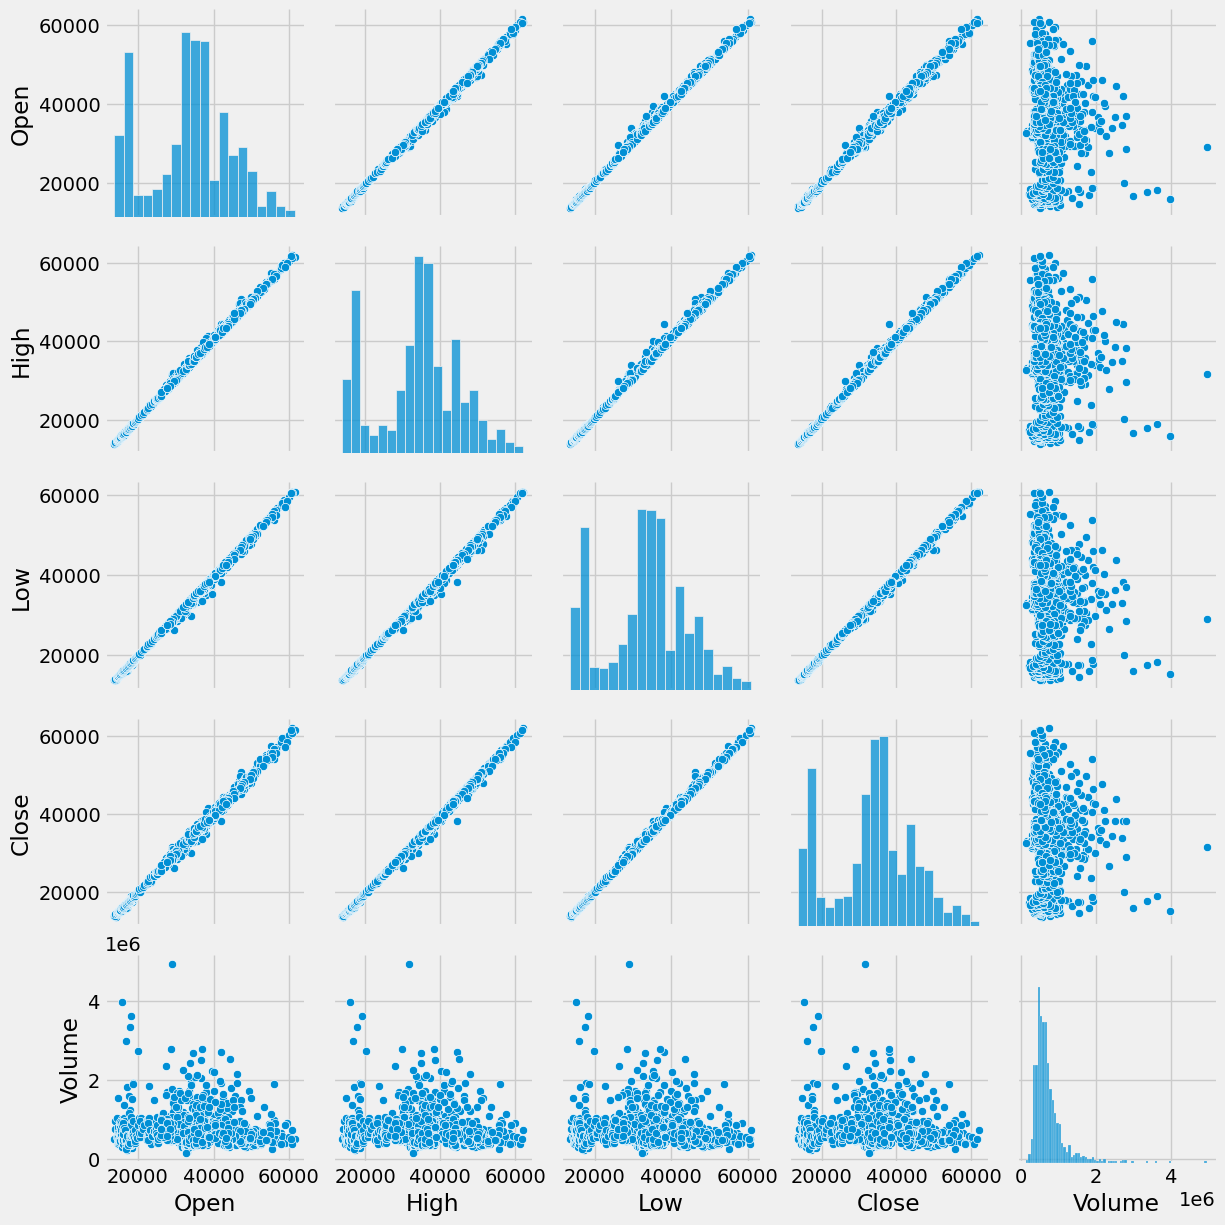

In [14]:
sns.pairplot(dataset[["Open","High","Low","Close","Volume"]])
plt.show()

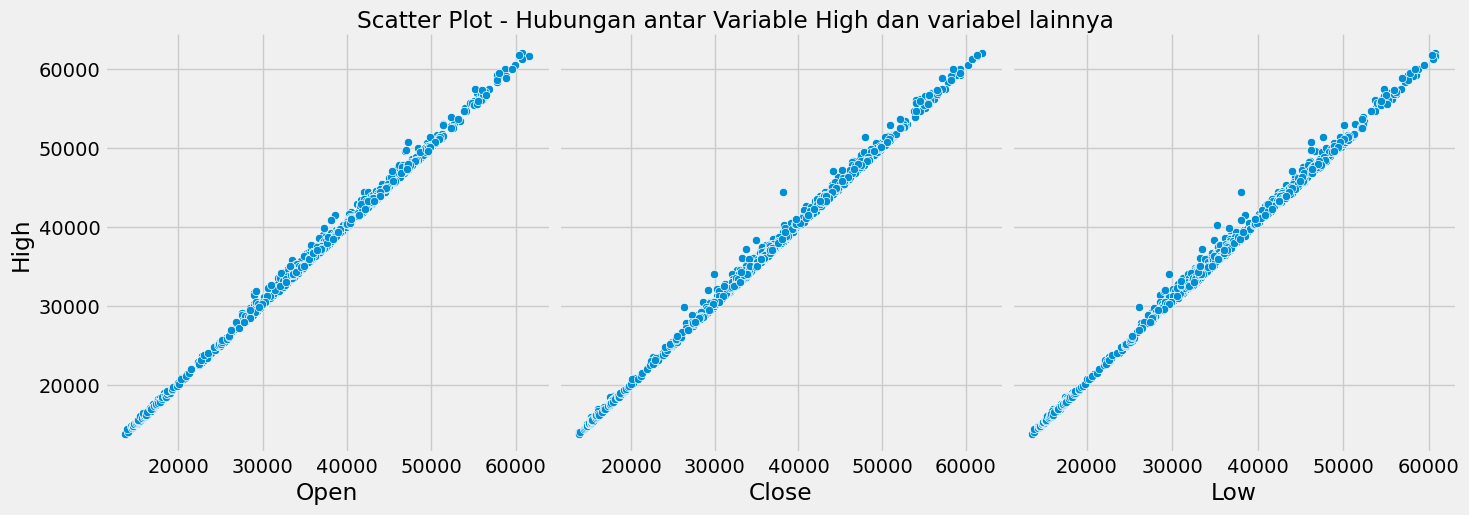

In [15]:
sns.pairplot(dataset, x_vars=['Open', 'Close', 'Low'], y_vars=['High'], kind='scatter', height=5)
plt.suptitle('Scatter Plot - Hubungan antar Variable High dan variabel lainnya', y=1.02)
plt.show()

C:\Users\Reksi Haloho\AppData\Local\Temp\ipykernel_8032\3386426327.py:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(dataset[cols], kde=True,  bins=10, palette="bright")
C:\Users\Reksi Haloho\anaconda3\envs\tf-new\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Reksi Haloho\AppData\Local\Temp\ipykernel_8032\3386426327.py:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(dataset[cols], kde=True,  bins=10, palette="bright")
C:\Users\Reksi Haloho\anaconda3\envs\tf-new\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', T

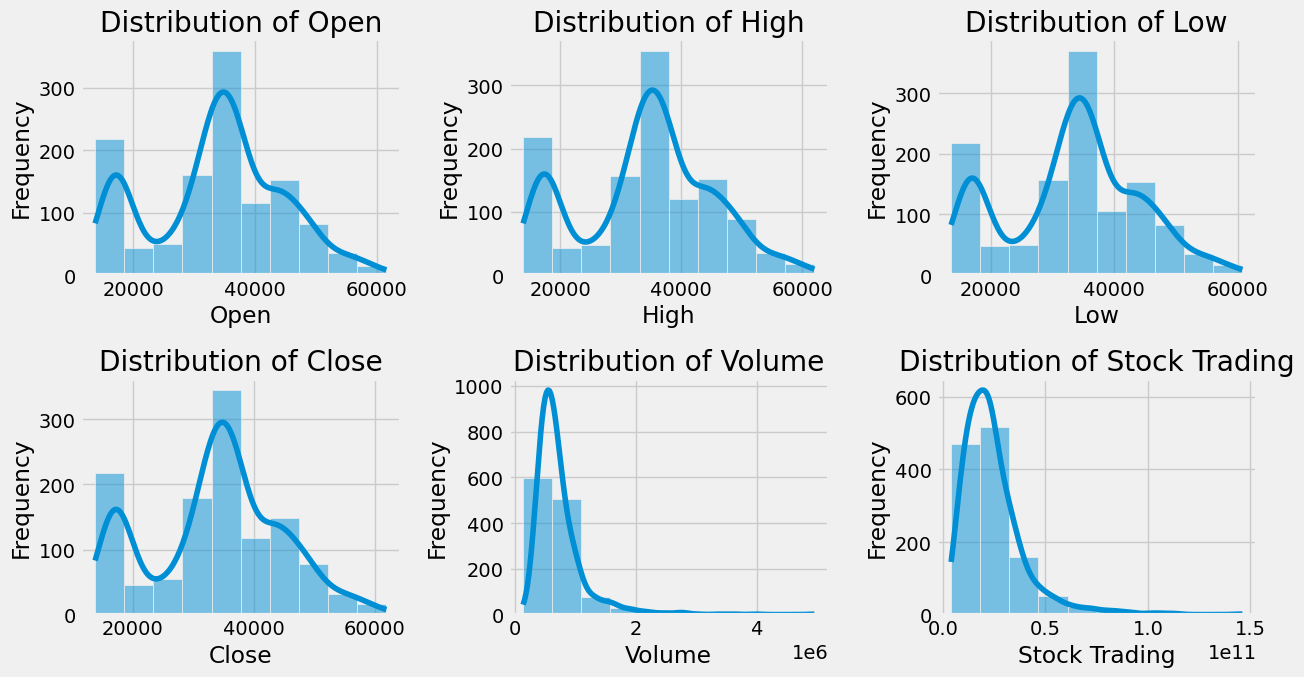

In [16]:
select_datatpes=dataset.select_dtypes(include=["int64"]).columns
plt.figure(figsize=(13, 7))

for i, cols in enumerate(select_datatpes):
    plt.subplot(2, 3, i+1)
    sns.histplot(dataset[cols], kde=True,  bins=10, palette="bright")
    plt.title(f"Distribution of {cols}")
    plt.xlabel(cols)
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

# Data Processing

### Drop Duplicate

In [17]:
print ("Before drop duplicated data")
dataset.shape

Before drop duplicated data


(1233, 6)

In [18]:
data = dataset.drop_duplicates(keep='first')

In [19]:
print ("After drop duplicated data")
dataset.shape

After drop duplicated data


(1233, 6)

#### Handling Missing Values

In [20]:
# Checking Missing Value
dataset.isna().sum()

Open             0
High             0
Low              0
Close            0
Volume           0
Stock Trading    0
dtype: int64

In [21]:
#### Hadling Outliers

In [22]:
dataset.describe()

,Open,High,Low,Close,Volume,Stock Trading
count,1233.000000,1233.000000,1233.000000,1233.000000,1.233000e+03,1.233000e+03
mean,33790.490673,34214.468775,33383.592863,33795.429846,7.286687e+05,2.447893e+10
std,10794.171777,10916.449594,10676.623182,10795.797988,4.136818e+05,1.528231e+10
min,13720.000000,13840.000000,13600.000000,13720.000000,1.391000e+05,3.966140e+09
25%,27940.000000,28330.000000,27480.000000,27800.000000,4.897000e+05,1.455381e+10
50%,34500.000000,34895.000000,33950.000000,34480.000000,6.261000e+05,2.155872e+10
75%,41450.000000,41900.000000,40830.000000,41370.000000,8.270000e+05,3.029136e+10
max,61550.000000,61970.000000,60740.000000,61930.000000,4.937300e+06,1.460450e+11


In [23]:
dataset.head()

,Open,High,Low,Close,Volume,Stock Trading
Date,,,,,,
2012-01-04,14050,14050,13700,13720,559100,7719804000
2012-01-05,13720,13840,13600,13800,511500,7030811000
2012-01-06,13990,14030,13790,13850,765500,10635609000
2012-01-10,13890,14390,13860,14390,952300,13533413000
2012-01-11,14360,14750,14280,14590,1043400,15191988000


# Model Artificial Neural Network

#### Data Splitting

In [24]:
training_set = dataset[:'2014-12-30'].iloc[:,3:4].values
test_set = dataset['2015-01-05':].iloc[:,3:4].values

In [44]:
print ("Data Training Set sebanyak:", training_set.shape)
print ("Data Test Set sebanyak:", test_set.shape)

Data Training Set sebanyak: (737, 1)
Data Test Set sebanyak: (496, 1)


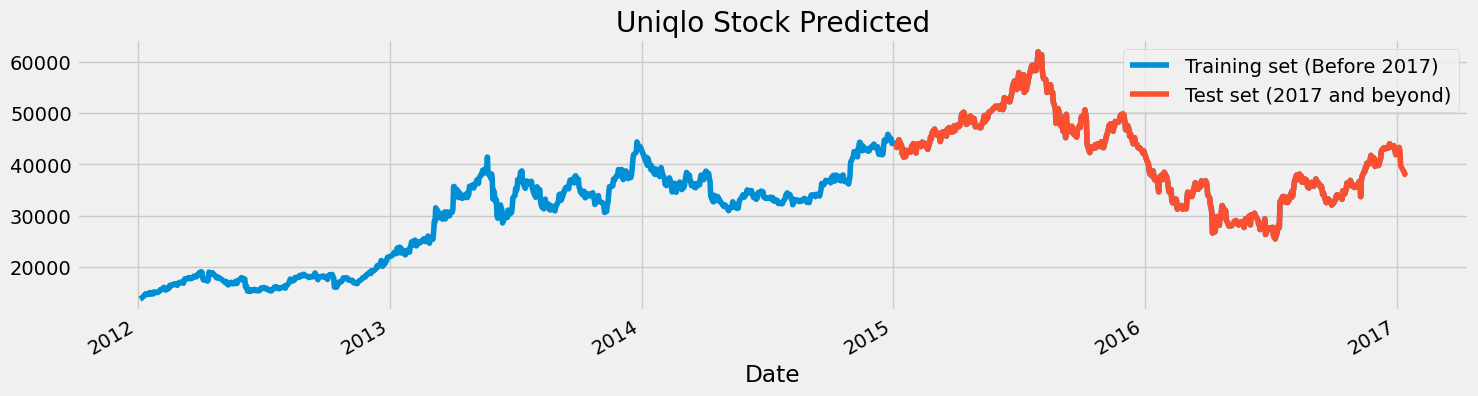

In [26]:
# Choosing "close" for Pridict Stock Price
dataset['Close'][:'2016-12-31'].plot(figsize=(16,4),legend=True)
dataset['Close']['2015-01-05':].plot(figsize=(16,4),legend=True)
plt.legend (['Training set (Before 2017)','Test set (2017 and beyond)'])
plt.title ("Uniqlo Stock Predicted")
plt.show()

In [27]:
from sklearn.preprocessing import MinMaxScaler

# Scalling The Train Test
sc = MinMaxScaler(feature_range=(0,1))
train_set_scaled = sc.fit_transform(training_set)

In [28]:
train_set_scaled.shape

(737, 1)

In [30]:
X_train = []
y_train = []
for i in range (60,737):
    X_train.append(train_set_scaled[i-60:i,0])
    y_train.append(train_set_scaled[i,0])
X_train, y_train = np.array(X_train), np.array (y_train)

In [31]:
#Reshaping X Train
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1],1))
X_train

array([[[0.        ],
        [0.00249144],
        [0.00404858],
        ...,
        [0.14761756],
        [0.14419184],
        [0.15291187]],

       [[0.00249144],
        [0.00404858],
        [0.02086577],
        ...,
        [0.14419184],
        [0.15291187],
        [0.16007474]],

       [[0.00404858],
        [0.02086577],
        [0.02709436],
        ...,
        [0.15291187],
        [0.16007474],
        [0.16536904]],

       ...,

       [[0.71909063],
        [0.71582062],
        [0.71815634],
        ...,
        [0.95935846],
        [1.        ],
        [0.99330427]],

       [[0.71582062],
        [0.71815634],
        [0.70538773],
        ...,
        [1.        ],
        [0.99330427],
        [0.98442853]],

       [[0.71815634],
        [0.70538773],
        [0.73653068],
        ...,
        [0.99330427],
        [0.98442853],
        [0.97056992]]])

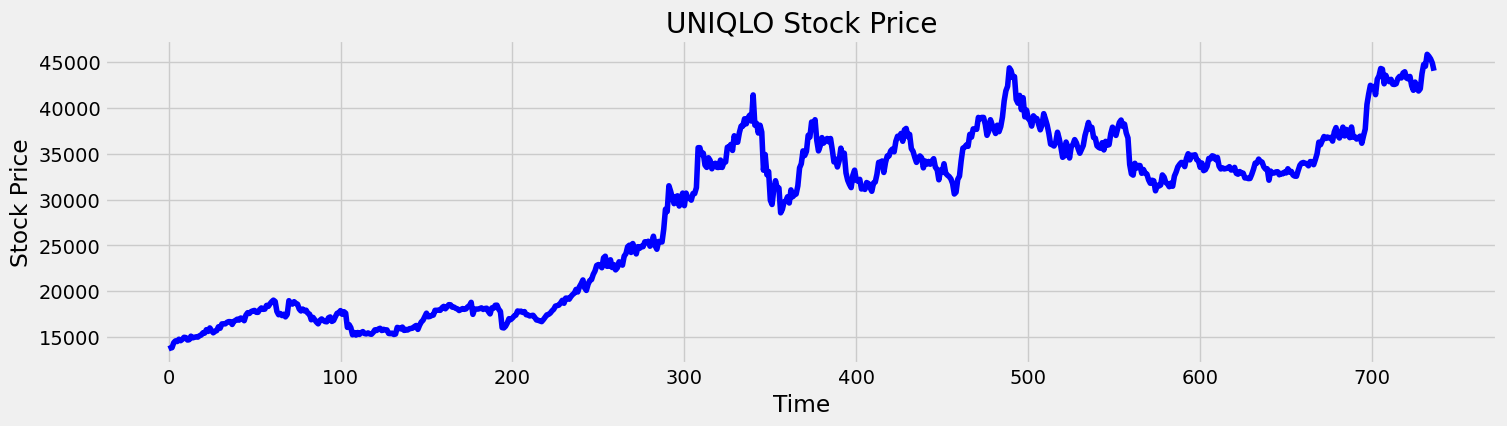

In [32]:
# Visualisasi Training test

plt.figure(figsize=(16,4))
plt.plot(training_set,color="blue");
plt.ylabel("Stock Price")
plt.title("UNIQLO Stock Price")
plt.xlabel("Time")
plt.show()

## 1. LSTM Model

In [34]:
from sklearn.metrics import mean_squared_error
import math

In [35]:
def plot_prediction (test, predicted):
    plt.plot (test, color='red', label='Real Stock Price')
    plt.plot (predicted, color='blue', label='Predicted Stock Price')
    plt.title ('Uniqlo Stock Price Prediction')
    plt.xlabel ('Time')
    plt.ylabel ('Stock Price')
    plt.legend()
    plt.show()

def return_rmse (test, predicted):
    MSE = np.square(np.subtract(test,predicted)).mean() 
    rmse = math.sqrt(MSE)
    print ("The Root Mean Squared Error is {}.".format(rmse))

In [36]:
#The LSTM architecture
model_lstm = Sequential ()
#First LSTM Layer with Dropout regularisation
model_lstm.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1],1)))
model_lstm.add(Dropout(0.2))
#Second LSTM Layer
model_lstm.add(LSTM(units=50, return_sequences=True))
model_lstm.add(Dropout(0.2))
#Third LSTM Layer
model_lstm.add(LSTM(units=50, return_sequences=True))
model_lstm.add(Dropout(0.2))
#Fourth LSTM Layer
model_lstm.add(LSTM(units=50))
model_lstm.add(Dropout(0.2))
#The Output Layer
model_lstm.add(Dense(units=1))

#compiling the RNN
model_lstm.compile(optimizer='rmsprop',loss='mean_squared_error')
#Fitting to train test
model_lstm.fit(X_train, y_train, epochs=75, batch_size=32)

Epoch 1/75
22/22 [==============================] - 17s 126ms/step - loss: 0.0487
Epoch 2/75
22/22 [==============================] - 3s 126ms/step - loss: 0.0190
Epoch 3/75
22/22 [==============================] - 3s 127ms/step - loss: 0.0193
Epoch 4/75
22/22 [==============================] - 3s 128ms/step - loss: 0.0159
Epoch 5/75
22/22 [==============================] - 3s 126ms/step - loss: 0.0135
Epoch 6/75
22/22 [==============================] - 3s 127ms/step - loss: 0.0131
Epoch 7/75
22/22 [==============================] - 3s 130ms/step - loss: 0.0132
Epoch 8/75
22/22 [==============================] - 3s 129ms/step - loss: 0.0110
Epoch 9/75
22/22 [==============================] - 3s 128ms/step - loss: 0.0110
Epoch 10/75
22/22 [==============================] - 3s 140ms/step - loss: 0.0102
Epoch 11/75
22/22 [==============================] - 3s 125ms/step - loss: 0.0095
Epoch 12/75
22/22 [==============================] - 3s 124ms/step - loss: 0.0089
Epoch 13/75
22/22 [=====

In [37]:
dataset_total = pd.concat((dataset['Close'][:'2014-12-30'], dataset['Close']['2015-01-05':]), axis=0)
inputs = dataset_total [len (dataset_total)-len(test_set)-60:].values
inputs = inputs.reshape (-1,1)
inputs = sc.transform(inputs)

In [38]:
inputs.shape

(556, 1)

In [39]:
# Preparing X_test and predicting Stock
import numpy as np
X_test = []
for i in range (60, 556):
    X_test.append (inputs[i-60:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test,(X_test.shape[0], X_test.shape[1],1))
predicted_stock_price = model_lstm.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

16/16 [==============================] - 3s 38ms/step


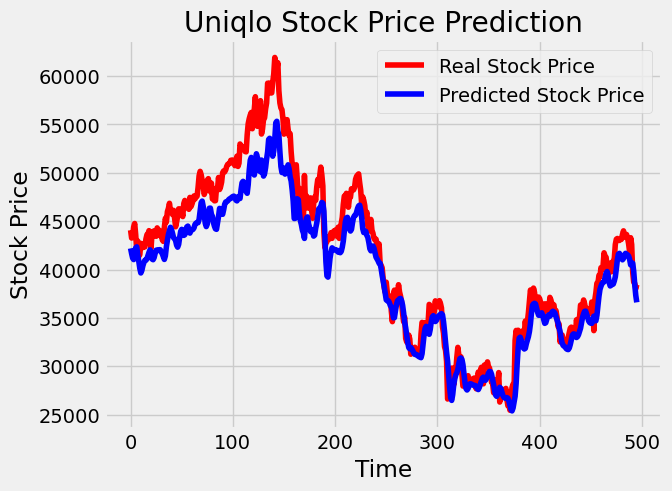

In [40]:
plot_prediction(test_set, predicted_stock_price)

In [41]:
# Evaluating Our Model
return_rmse (test_set, predicted_stock_price)

The Root Mean Squared Error is 2701.965327706901.


## 2. GRU

In [45]:
#The GRU architecture
LSTM_GRU = Sequential ()
#First GRU Layer with Dropout regularisation
LSTM_GRU.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
LSTM_GRU.add(Dropout(0.2))
#Second GRU Layer
LSTM_GRU.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
LSTM_GRU.add(Dropout(0.2))
#Third GRU Layer
LSTM_GRU.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
LSTM_GRU.add(Dropout(0.2))
#Fourth GRU Layer
LSTM_GRU.add(GRU(units=50, activation='tanh'))
LSTM_GRU.add(Dropout(0.2))
#The Output Layer
LSTM_GRU.add(Dense(units=1))

#compiling the RNN
LSTM_GRU.compile(optimizer=SGD(lr=0.01,decay=1e-7, momentum=0.9, nesterov=False),loss='mean_squared_error')
#Fitting to train test
LSTM_GRU.fit(X_train, y_train, epochs=75, batch_size=150)

Epoch 1/75


C:\Users\Reksi Haloho\anaconda3\envs\tf-new\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


5/5 [==============================] - 14s 212ms/step - loss: 0.2204
Epoch 2/75
5/5 [==============================] - 1s 216ms/step - loss: 0.1419
Epoch 3/75
5/5 [==============================] - 1s 215ms/step - loss: 0.0675
Epoch 4/75
5/5 [==============================] - 1s 215ms/step - loss: 0.0851
Epoch 5/75
5/5 [==============================] - 1s 214ms/step - loss: 0.0468
Epoch 6/75
5/5 [==============================] - 1s 215ms/step - loss: 0.0469
Epoch 7/75
5/5 [==============================] - 1s 217ms/step - loss: 0.0287
Epoch 8/75
5/5 [==============================] - 1s 217ms/step - loss: 0.0265
Epoch 9/75
5/5 [==============================] - 1s 212ms/step - loss: 0.0163
Epoch 10/75
5/5 [==============================] - 1s 213ms/step - loss: 0.0106
Epoch 11/75
5/5 [==============================] - 1s 214ms/step - loss: 0.0086
Epoch 12/75
5/5 [==============================] - 1s 213ms/step - loss: 0.0065
Epoch 13/75
5/5 [==============================] - 1s 212ms

In [48]:
# Preparing X_test and predicting Stock
X_test = []
for i in range (60, 556):
    X_test.append (inputs[i-60:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1],1))
GRU_predicted_stock_price = LSTM_GRU.predict(X_test)
GRU_predicted_stock_price = sc.inverse_transform(GRU_predicted_stock_price)

16/16 [==============================] - 1s 47ms/step


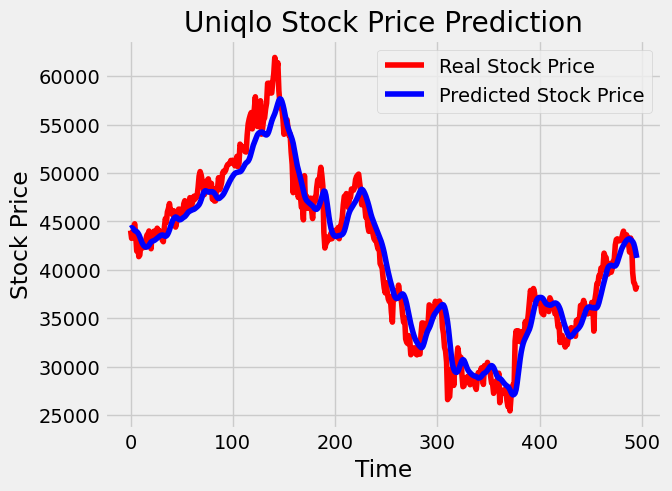

In [49]:
plot_prediction(test_set, GRU_predicted_stock_price)

In [50]:
# Evaluating GRU
return_rmse (test_set, GRU_predicted_stock_price)

The Root Mean Squared Error is 1987.8663333428333.
